In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import gc

In [2]:
data_info = pd.read_csv("data_info.csv")
data_info

변수명                                               변수설명
0             sessionID                                              세션 ID
1                userID                                             사용자 ID
2                TARGET                                     세션에서 발생한 총 조회수
3               browser                                           사용된 브라우저
4                    OS                                       사용된 기기의 운영체제
5                device                                             사용된 기기
6                   new                      첫 방문 여부 (0: 첫 방문 아님, 1: 첫 방문)
7              quality                세션의 질 (거래 성사를 기준으로 측정된 값, 범위: 1~100)
8             duration                                     총 세션 시간 (단위: 초)
9              bounced                          이탈 여부 (0: 이탈하지 않음, 1: 이탈함)
10         transaction                                    세션 내에서 발생의 거래의 수
11  transaction_revenue                                            총 거래 수익
12            continent                                         세션이 발생한 대륙
13         subcontinent                                      세션이 발생한 하위 대륙
14             country                                          세션이 발생한 국가
15      traffic_source                                        트래픽이 발생한 소스 
16       traffic_medium                                         트래픽 소스의 매체
17              keyword  트래픽 소스의 키워드, 일반적으로 traffic_medium이 organic, cp...
18       referral_path                traffic_medium이 referral인 경우 설정되는 경로

In [59]:
pip install pandas pyarrow

     |████████████████████████████████| 19.1 MB 530 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
def csv_to_parquet(csv_path, save_name):
    df = pd.read_csv(csv_path)
    df.to_parquet(f'./data/open/{save_name}.parquet')
    del df
    gc.collect()
    print(save_name, 'Done.')

In [1]:
csv_to_parquet('./data/open/train.csv', 'train')
csv_to_parquet('./data/open/test.csv', 'test')

In [293]:
dataset = pd.read_parquet("./data/open/train.parquet")
test_data = pd.read_parquet("./data/open/test.parquet")

In [3]:
dataset.head()

sessionID       userID  TARGET           browser         OS   device  \
0  SESSION_000000  USER_000000    17.0            Chrome  Macintosh  desktop   
1  SESSION_000001  USER_000001     3.0            Chrome    Windows  desktop   
2  SESSION_000002  USER_000002     1.0  Samsung Internet    Android   mobile   
3  SESSION_000003  USER_000003     1.0            Chrome  Macintosh  desktop   
4  SESSION_000004  USER_000004     1.0            Chrome        iOS   mobile   

   new  quality  duration  bounced  transaction  transaction_revenue  \
0    0     45.0     839.0        0          0.0                  0.0   
1    1      1.0      39.0        0          0.0                  0.0   
2    1      1.0       0.0        1          0.0                  0.0   
3    1      1.0       0.0        1          0.0                  0.0   
4    0      1.0       0.0        1          0.0                  0.0   

  continent      subcontinent        country     traffic_source  \
0  Americas  Northern America  United States             google   
1    Europe    Western Europe        Germany             google   
2      Asia    Southeast Asia       Malaysia           (direct)   
3  Americas  Northern America  United States           Partners   
4  Americas  Northern America  United States  groups.google.com   

  traffic_medium    keyword        referral_path  
0        organic  Category8                 None  
1        organic  Category8                 None  
2         (none)       None                 None  
3      affiliate       None                 None  
4       referral       None  Category6_Path_0000

In [74]:
dataset['transaction_revenue'].sort_values(ascending=False)

245073    3.325712e+09
249099    3.121430e+09
27701     2.497824e+09
157773    2.436936e+09
61358     2.002111e+09
              ...     
167630    0.000000e+00
167629    0.000000e+00
167628    0.000000e+00
167626    0.000000e+00
0         0.000000e+00
Name: transaction_revenue, Length: 252289, dtype: float64

# session ID, userID 처리 -> drop

In [102]:
user_000004_rows = dataset[dataset['userID'] == 'USER_000004']
user_000004_rows

sessionID       userID  TARGET browser   OS  device  new  quality  \
4      SESSION_000004  USER_000004     1.0  Chrome  iOS  mobile    0      1.0   
13390  SESSION_013390  USER_000004     9.0  Chrome  iOS  mobile    0     23.0   
17151  SESSION_017151  USER_000004     1.0  Chrome  iOS  mobile    0      1.0   

       duration  bounced  transaction  transaction_revenue continent  \
4           0.0        1          0.0                  0.0  Americas   
13390     623.0        0          0.0                  0.0  Americas   
17151       0.0        1          0.0                  0.0  Americas   

           subcontinent        country traffic_source traffic_medium  \
4      Northern America  United States         google       referral   
13390  Northern America  United States         google       referral   
17151  Northern America  United States         google       referral   

              keyword        referral_path  
4      not_applicable  Category6_Path_0000  
13390  not_applicable  Category6_Path_0000  
17151  not_applicable  Category6_Path_0000

In [6]:
len(dataset['userID'].unique())

206024

In [7]:
len(dataset['sessionID'].unique())

252289

In [8]:
dataset.groupby("userID")['sessionID'].count()

userID
USER_000000    1
USER_000001    1
USER_000002    1
USER_000003    1
USER_000004    3
              ..
USER_206019    1
USER_206020    1
USER_206021    1
USER_206022    1
USER_206023    1
Name: sessionID, Length: 206024, dtype: int64

# duration, bounced 처리

In [78]:
mean_target_non_bounced = dataset[dataset["bounced"] == 0]["TARGET"].mean()
mean_target_bounced = dataset[dataset["bounced"] == 1]["TARGET"].mean()

# 결과 출력
print(f"Mean TARGET when 'bounced' == 0: {mean_target_non_bounced}")
print(f"Mean TARGET when 'bounced' == 1: {mean_target_bounced}")

# 'bounced'에 따른 'TARGET'의 분포를 시각화
fig = px.histogram(dataset, x="TARGET", color="bounced", barmode='overlay',
                   title="Distribution of TARGET based on 'bounced' value")
fig.show()

Mean TARGET when 'bounced' == 0: 6.120446841656164
Mean TARGET when 'bounced' == 1: 1.0


# duration(머문 시간 = 0초)이면서 bounced=0(이탈하지 않음)인 데이터 제거

In [79]:
len(dataset[(dataset["duration"] == 0) & (dataset["bounced"] == 0)]) / len(dataset[(dataset["duration"] == 0)]) * 100

0.28661553488223146

In [80]:
len(dataset[(dataset["duration"] == 0) & (dataset["bounced"] == 1)]) / len(dataset[(dataset["duration"] == 0)]) * 100

99.71338446511777

In [81]:
# dataset에서 duration이 0이고 bounced가 0인 행을 제거합니다.
dataset = dataset[(dataset["duration"] != 0) | (dataset["bounced"] != 0)]

# browser 처리 -> 이러고 onehotencoding예정

In [82]:
pd.set_option('display.max_rows', None)
browser_counts = dataset['browser'].value_counts()
browser_counts

Chrome                                                  174154
Safari                                                   35658
Android Webview                                          13838
Firefox                                                   8427
Internet Explorer                                         4566
Edge                                                      3687
Samsung Internet                                          3064
Opera Mini                                                3031
Safari (in-app)                                           1986
Opera                                                     1330
UC Browser                                                 900
YaBrowser                                                  401
Amazon Silk                                                256
Coc Coc                                                    205
Mozilla Compatible Agent                                   123
Android Browser                                        

In [83]:
pd.set_option('display.max_rows', 20)

In [85]:
len(dataset[(dataset["browser"] == 'Safari (in-app)') & (dataset["device"] == 'desktop')])

0

Safari(in-app) 필요없는 것 확인 -> 어차피 device에서 나뉨

In [86]:
# 'browser' 컬럼에서 'Safari (in-app)'를 'Safari'로 변경
dataset['browser'] = dataset['browser'].replace('Safari (in-app)', 'Safari')

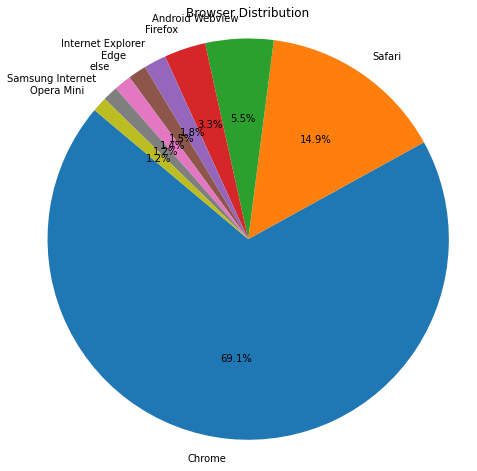

In [87]:
# 'browser' 칼럼 값들의 비율 구하기
browser_percentage = dataset['browser'].value_counts(normalize=True)

# 비율이 0.01보다 작은 값들을 'else'로 변경
threshold = 0.01
to_replace = browser_percentage[browser_percentage < threshold].index
dataset.loc[dataset['browser'].isin(to_replace), 'browser'] = 'else'

# 시각화
plt.figure(figsize=(8, 8))
plt.pie(dataset['browser'].value_counts(), labels=dataset['browser'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Browser Distribution')
plt.axis('equal')  # 원 그래프를 원형으로 유지
plt.show()

In [88]:
dataset['browser'].unique()

array(['Chrome', 'Samsung Internet', 'Firefox', 'else', 'Safari', 'Edge',
       'Android Webview', 'Internet Explorer', 'Opera Mini'], dtype=object)

# OS처리 -> browser과 마찬가지, 처리는 ??

In [89]:
pd.set_option('display.max_rows', None)
OS_counts = dataset['OS'].value_counts()
OS_counts

Windows             88004
Macintosh           60225
Android             51786
iOS                 29751
Linux                9551
Chrome OS            9210
(not set)            2579
Tizen                 318
Samsung               258
Windows Phone         127
OS/2                   36
Xbox                   31
BlackBerry             29
Playstation Vita        9
Nintendo 3DS            6
Firefox OS              4
FreeBSD                 3
SunOS                   1
SymbianOS               1
Nokia                   1
Nintendo WiiU           1
Name: OS, dtype: int64

In [91]:
pd.set_option('display.max_rows', 20)

In [96]:
OS_percentages = dataset['OS'].value_counts(normalize=True)
OS_percentages * 100

Windows      34.931787
Macintosh    23.905355
Android      20.555628
iOS          11.809186
Linux         3.791117
Chrome OS     3.655763
(not set)     1.023693
else          0.327471
Name: OS, dtype: float64

In [97]:
threshold = 0.01
to_replace = OS_percentages[OS_percentages < threshold].index
dataset.loc[dataset['OS'].isin(to_replace), 'OS'] = 'else'

In [98]:
dataset['OS'].unique()

array(['Macintosh', 'Windows', 'Android', 'iOS', 'Linux', 'else',
       'Chrome OS', '(not set)'], dtype=object)

OS의 value값이 (not set)일 경우에 분석해보려 했으나 유의미한 값 도출 X

In [99]:
notOS = dataset[dataset["OS"] == '(not set)']

In [100]:
notOS['browser'].value_counts()

Opera Mini    2384
else           147
Chrome          48
Name: browser, dtype: int64

In [101]:
notOS['device'].value_counts()

mobile     2382
desktop     195
tablet        2
Name: device, dtype: int64

# device처리 -> one-hot-encoding

In [102]:
device_counts = dataset['device'].value_counts()
device_counts

desktop    166902
mobile      76355
tablet       8674
Name: device, dtype: int64

In [103]:
device_percentages = dataset['device'].value_counts(normalize=True) * 100
device_percentages

desktop    66.249092
mobile     30.307902
tablet      3.443006
Name: device, dtype: float64

# continent 처리 -> onehotencoding

In [180]:
continent_percentages = dataset['continent'].value_counts(normalize=True) * 100
continent_percentages

Americas     50.137538
Asia         22.690737
Europe       21.311391
Africa        4.167808
Oceania       1.559951
(not set)     0.132576
Name: continent, dtype: float64

# subcontinent 처리 -> ??

In [181]:
pd.set_option('display.max_rows', None)
subcontinent_percentages = dataset['subcontinent'].value_counts(normalize=True) * 100
subcontinent_percentages

Northern America    44.364925
Southern Asia        8.619424
Western Europe       7.267863
Northern Europe      6.118739
Southeast Asia       5.538421
Eastern Asia         5.389968
Southern Europe      4.261484
South America        3.881618
Eastern Europe       3.663305
Western Asia         3.040515
else                 2.448686
Northern Africa      2.194252
Central America      1.665138
Australasia          1.545661
Name: subcontinent, dtype: float64

In [182]:
pd.set_option('display.max_rows', 20)

# country 처리 -> 미국이랑 아닌거랑으로 처리, -> onehotencoding

In [109]:
pd.set_option('display.max_rows', None)
country_percentages = dataset['country'].value_counts(normalize=True) * 100
country_percentages
# 일단 여기까지 함

United States               41.293846
India                        7.651301
United Kingdom               3.972119
Canada                       3.067507
Germany                      2.507036
France                       2.131139
Japan                        2.062469
Brazil                       2.001739
Spain                        1.713961
Egypt                        1.673871
Taiwan                       1.590912
Thailand                     1.442458
Mexico                       1.412291
Turkey                       1.404750
Netherlands                  1.324966
Australia                    1.317821
Vietnam                      1.289242
Russia                       1.211443
Italy                        1.186039
South Korea                  0.925650
Indonesia                    0.878018
South Africa                 0.846263
Poland                       0.741870
Singapore                    0.724008
Ireland                      0.671216
Sweden                       0.615645
Nigeria     

In [27]:
pd.set_option('display.max_rows', 20)

In [28]:
dataset['country'] = dataset['country'].apply(lambda x: x if x == 'United States' else 'not United States')

In [29]:
len(dataset['country'].unique())

2

In [190]:
# continent, subcontinent, country 칼럼을 '_'로 묶어서 하나의 칼럼으로 만듭니다.
dataset['location'] = dataset['continent'] + '_' + dataset['subcontinent'] + '_' + dataset['country']

# 기존의 continent, subcontinent, country 칼럼을 제거합니다.
dataset.drop(['continent', 'subcontinent', 'country'], axis=1, inplace=True)

In [197]:
pd.set_option('display.max_rows', None)
location_percentages = dataset['location'].value_counts(normalize=True) 
location_percentages* 100

Americas_Northern America_United States    41.293846
else                                       19.745089
Asia_Southern Asia_India                    7.651301
Europe_Northern Europe_United Kingdom       3.972119
Americas_Northern America_Canada            3.067507
Europe_Western Europe_Germany               2.507036
Europe_Western Europe_France                2.131139
Asia_Eastern Asia_Japan                     2.062469
Americas_South America_Brazil               2.001739
Europe_Southern Europe_Spain                1.713961
Africa_Northern Africa_Egypt                1.673871
Asia_Eastern Asia_Taiwan                    1.590912
Asia_Southeast Asia_Thailand                1.442458
Americas_Central America_Mexico             1.412291
Asia_Western Asia_Turkey                    1.404750
Europe_Western Europe_Netherlands           1.324966
Oceania_Australasia_Australia               1.317821
Asia_Southeast Asia_Vietnam                 1.289242
Europe_Eastern Europe_Russia                1.

In [198]:
threshold = 0.01
to_replace = location_percentages[location_percentages < threshold].index
dataset.loc[dataset['location'].isin(to_replace), 'location'] = 'else'

In [199]:
location_percentages* 100

Americas_Northern America_United States    41.293846
else                                       19.745089
Asia_Southern Asia_India                    7.651301
Europe_Northern Europe_United Kingdom       3.972119
Americas_Northern America_Canada            3.067507
Europe_Western Europe_Germany               2.507036
Europe_Western Europe_France                2.131139
Asia_Eastern Asia_Japan                     2.062469
Americas_South America_Brazil               2.001739
Europe_Southern Europe_Spain                1.713961
Africa_Northern Africa_Egypt                1.673871
Asia_Eastern Asia_Taiwan                    1.590912
Asia_Southeast Asia_Thailand                1.442458
Americas_Central America_Mexico             1.412291
Asia_Western Asia_Turkey                    1.404750
Europe_Western Europe_Netherlands           1.324966
Oceania_Australasia_Australia               1.317821
Asia_Southeast Asia_Vietnam                 1.289242
Europe_Eastern Europe_Russia                1.

# traffic source 처리 -> onehotencoding

In [111]:
dataset["traffic_source"].unique()

array(['google', '(direct)', 'Partners', 'groups.google.com',
       'youtube.com', 'google.com', 'bing', 'google.co.jp',
       'analytics.google.com', 'baidu', 'quora.com',
       'googleads.g.doubleclick.net', 'pinterest.com', 'mail.google.com',
       'dealspotr.com', 'qiita.com', 'l.facebook.com', 'reddit.com',
       'sites.google.com', 'blog.golang.org', 'support.google.com',
       'yahoo', 'dfa', 't.co', 'lunametrics.com', 'docs.google.com',
       'adwords.google.com', 's0.2mdn.net', 'm.baidu.com',
       'm.facebook.com', 'int.search.tb.ask.com', 'google.com.br',
       'google.es', 'arstechnica.com', 'msn.com', 'tw.search.yahoo.com',
       'facebook.com', 'google.de', 'hangouts.google.com',
       'duckduckgo.com', 'r.search.aol.com', 'my.yahoo.com',
       'google.co.za', 'au.search.yahoo.com', 'in.search.yahoo.com',
       'outlook.live.com', 'productforums.google.com', 'ask',
       'google.co.id', 'google.co.uk', 'myactivity.google.com',
       'google.com.ua', 'google

In [112]:
traffic_source_values = dataset["traffic_source"].value_counts()

In [113]:
# 'traffic_source' 값을 '.'을 기준으로 split하여 새로운 칼럼에 할당
split_columns = dataset['traffic_source'].str.split('.', expand=True)

# 실제 생성된 칼럼 수에 맞춰 칼럼 이름 동적 생성
column_names = ['first word', 'second word', 'third word', 'fourth word', 'fifth word'][:split_columns.shape[1]]

# 결과 데이터프레임에 새로운 칼럼 이름 할당
split_columns.columns = column_names

In [114]:
for i in split_columns.columns:
    more_100 = split_columns[i].value_counts()
    print(more_100[more_100 > 100])

google       117313
(direct)      58921
youtube       52788
analytics      7608
Partners       5368
sites          2499
bing            703
reddit          680
qiita           547
quora           502
mail            481
baidu           459
dfa             436
away            379
plus            368
groups          314
m               284
facebook        264
support         242
yahoo           214
l               194
blog            186
Name: first word, dtype: int64
com         56471
google      11434
facebook      482
vk            379
url           298
co            188
golang        186
search        128
Name: second word, dtype: int64
com       12409
google      298
org         187
Name: third word, dtype: int64
com    391
Name: fourth word, dtype: int64
Series([], Name: fifth word, dtype: int64)


google -> 모두 구글로 통일

In [115]:
dataset.loc[dataset['traffic_source'].str.contains('google', case=False, na=False), 'traffic_source'] = 'google'

facebook -> 모두 facebook로 통일<br/>
youtube -> 모두 youtube로 통일<br/>
yahoo -> 모두 yahoo로 통일<br/>
pinterest -> 모두 pinterest로 통일

In [117]:
dataset.loc[dataset['traffic_source'].str.contains('facebook', case=False, na=False), 'traffic_source'] = 'facebook'
dataset.loc[dataset['traffic_source'].str.contains('yahoo', case=False, na=False), 'traffic_source'] = 'yahoo'
dataset.loc[dataset['traffic_source'].str.contains('youtube', case=False, na=False), 'traffic_source'] = 'youtube'
dataset.loc[dataset['traffic_source'].str.contains('pinterest', case=False, na=False), 'traffic_source'] = 'pinterest'

In [118]:
dataset["traffic_source"].unique()

array(['google', '(direct)', 'Partners', 'youtube', 'bing', 'baidu',
       'quora.com', 'pinterest', 'dealspotr.com', 'qiita.com', 'facebook',
       'reddit.com', 'blog.golang.org', 'yahoo', 'dfa', 't.co',
       'lunametrics.com', 's0.2mdn.net', 'm.baidu.com',
       'int.search.tb.ask.com', 'arstechnica.com', 'msn.com',
       'duckduckgo.com', 'r.search.aol.com', 'outlook.live.com', 'ask',
       'sashihara.jp', 'github.com', 'myasucourses.asu.edu',
       'gophergala.com', 'learn.pct.edu', 'phandroid.com',
       'online-metrics.com', 'evernote.com', 'web.telegram.org',
       'search.1and1.com', 'getpocket.com', 'bluequill.franklin.edu',
       'feedly.com', 'search.snapdo.com', 'online.fullsail.edu',
       'away.vk.com', 'l.messenger.com', 'so.com', 'kik.com',
       'kidrex.org', 'search.tb.ask.com', 'search.xfinity.com',
       'businessinsider.com', 'aulagrado.esic.edu', 'mail1.swic.edu',
       'startpage.com', 'learn.colorado.edu', 'web.whatsapp.com',
       'lisham-web.b

In [119]:
Ts_percentages = dataset['traffic_source'].value_counts(normalize=True)
Ts_percentages

google                     0.512573
(direct)                   0.233878
youtube                    0.209506
Partners                   0.021307
facebook                   0.002961
bing                       0.002790
reddit.com                 0.002699
qiita.com                  0.002171
quora.com                  0.001993
baidu                      0.001822
dfa                        0.001731
away.vk.com                0.001504
yahoo                      0.001195
blog.golang.org            0.000738
dealspotr.com              0.000365
lunametrics.com            0.000322
duckduckgo.com             0.000298
t.co                       0.000254
linkedin.com               0.000179
sashihara.jp               0.000175
int.search.tb.ask.com      0.000155
aulagrado.esic.edu         0.000143
outlook.live.com           0.000123
pinterest                  0.000107
online-metrics.com         0.000103
ask                        0.000099
l.messenger.com            0.000067
phandroid.com              0

In [ ]:
threshold = 0.01
to_replace = Ts_percentages[Ts_percentages < threshold].index
dataset.loc[dataset['traffic_source'].isin(to_replace), 'traffic_source'] = 'else'

In [121]:
dataset["traffic_source"].unique()

array(['google', '(direct)', 'Partners', 'youtube', 'else'], dtype=object)

# traffic_medium 처리

traffic_medium이 none이라는 말은 특별한 매체없이 'direct, 직접 들어옴'이라는 뜻이고 확인결과 그러한 것으로 나타남

In [122]:
len(dataset[(dataset["traffic_source"] == '(direct)') & (dataset["traffic_medium"] == '(none)')])

58917

In [123]:
len(dataset[(dataset["traffic_source"] != '(direct)') & (dataset["traffic_medium"] == '(none)')])

0

In [124]:
(dataset["traffic_medium"] == '(none)').sum()

58917

In [125]:
traffic_medium_values = dataset["traffic_medium"].value_counts()
traffic_medium_values

organic      107265
referral      69934
(none)        58917
cpc            9944
affiliate      5364
cpm             501
(not set)         6
Name: traffic_medium, dtype: int64

# keyword 처리

In [126]:
dataset['keyword'].isnull().sum()

137451

In [127]:
tm_unique = dataset['traffic_medium'].unique()

for i in tm_unique:
    print(f'{i} :', len(dataset[(dataset['keyword'].isnull()) & (dataset['traffic_medium'] == i)]))

organic : 2680
(none) : 58917
affiliate : 5364
referral : 69934
cpc : 49
cpm : 501
(not set) : 6


keyword 칼럼의 값은 traffic_medium의 값이 organic, cpc일 경우에만 존재하는 값. 나머지는 null

In [128]:
for i in tm_unique:
    print(f'{i} :', len(dataset[(dataset['keyword'].notnull()) & (dataset['traffic_medium'] == i)]))

organic : 104585
(none) : 0
affiliate : 0
referral : 0
cpc : 9895
cpm : 0
(not set) : 0


In [129]:
pd.set_option('display.max_rows', None)
keyword_values = dataset["keyword"].value_counts()
keyword_values

Category8                103485
Category9                  3475
Category11                 1921
Category10                 1139
Category6_Keyword_003       634
Category12                  395
Category1_Keyword_000       387
Category6_Keyword_018       288
Category1_Keyword_006       250
Category4_Keyword_565       219
Category6_Keyword_012       199
Category1_Keyword_011       156
Category1_Keyword_001       110
Category1_Keyword_085       108
Category3_Keyword_141        81
Category5_Keyword_106        71
Category2_Keyword_014        69
Category7_Keyword_120        64
Category2_Keyword_009        63
Category1_Keyword_020        61
Category2_Keyword_231        41
Category2_Keyword_023        39
Category1_Keyword_002        39
Category1_Keyword_041        31
Category3_Keyword_147        30
Category3_Keyword_246        26
Category5_Keyword_066        22
Category1_Keyword_037        18
Category2_Keyword_005        18
Category4_Keyword_086        18
Category3_Keyword_043        17
Category

In [130]:
pd.set_option('display.max_rows', 20)

In [131]:
# 'keyword' 칼럼을 '_'를 기준으로 분할하여 첫 번째 요소를 'category' 칼럼에 저장
dataset['category'] = dataset['keyword'].str.split('_').str[0]

# Category1부터 Category100까지를 대상으로 각 카테고리가 'category'에 존재하면 'keyword'를 해당 카테고리로 변경
for i in range(1, 101):  # 1부터 100까지 반복
    category_name = f'Category{i}'  # 현재 카테고리 이름 생성
    dataset.loc[dataset['category'] == category_name, 'keyword'] = category_name

In [132]:
keyword_percentages = dataset['keyword'].value_counts(normalize=True) * 100
keyword_percentages
# 여기까지만.

Category8     90.395702
Category9      3.035465
Category11     1.678022
Category1      1.151293
Category10     0.994934
Category6      0.979210
Category2      0.670860
Category4      0.351153
Category12     0.345038
Category3      0.260307
Category5      0.082110
Category7      0.055905
Name: keyword, dtype: float64

In [55]:
dataset.drop(['category'],axis=1, inplace=True)

In [56]:
dataset.loc[dataset['keyword'].notnull() & (dataset['keyword'] != 'Category8'), 'keyword'] = 'NotCategory8'

In [57]:
keyword_percentages = dataset['keyword'].value_counts(normalize=True) * 100
keyword_percentages

Category8       90.376394
NotCategory8     9.623606
Name: keyword, dtype: float64

tm이 cpc일때와 organic일떄의 keyword데이터 분포 알아보기

In [58]:
cpc_Set = dataset[dataset['traffic_medium'] == 'cpc']
pd.set_option('display.max_rows', None)
keyword_counts = cpc_Set.groupby('keyword').size()
keyword_counts

keyword
NotCategory8    9929
dtype: int64

In [59]:
org_Set = dataset[dataset['traffic_medium'] == 'organic']
pd.set_option('display.max_rows', None)
keyword_counts = org_Set.groupby('keyword').size()
keyword_counts

keyword
Category8       103584
NotCategory8      1101
dtype: int64

## 결측치 처리완료

In [133]:
dataset['keyword'] = dataset['keyword'].fillna('not_applicable')
dataset['referral_path'] = dataset['referral_path'].fillna('not_applicable')

# referral_path 처리 -> mean encoding

In [134]:
pd.set_option('display.max_rows', None)

In [135]:
referral_path_percentages = dataset['referral_path'].value_counts(normalize=True) * 100
referral_path_percentages

not_applicable          63.866297
Category1                7.405202
Category3_Path_0013      2.865070
Category2_Path_0018      1.581385
Category6_Path_0008      1.279715
Category7_Path_0001      1.183260
Category2_Path_0063      0.938749
Category13_Path_0007     0.918505
Category12_Path_0046     0.824432
Category5_Path_0006      0.780372
Category2_Path_0256      0.737107
Category4_Path_0026      0.576348
Category11_Path_0012     0.571585
Category9_Path_0005      0.467588
Category13_Path_0029     0.464810
Category8_Path_0025      0.392568
Category11_Path_0073     0.390583
Category10_Path_1554     0.289762
Category13_Path_0044     0.242527
Category6_Path_0040      0.215535
Category2_Path_0010      0.192513
Category5_Path_0032      0.182193
Category2_Path_0101      0.177826
Category3_Path_0174      0.165125
Category6_Path_0042      0.157980
Category8_Path_0004      0.151629
Category6_Path_0930      0.150835
Category12_Path_0024     0.149247
Category6_Path_0033      0.144881
Category2_Path

In [136]:
pd.set_option('display.max_rows', 20)

referral_path가 null값이면서 traffic_medium이 referral인 것은 당연히 존재하지 않음

In [137]:
len(dataset[(dataset['referral_path'].isnull()) & (dataset['traffic_medium'] == 'referral')])

0

## referral_path값이 존재하지만 traffic_medium이 (none)인값들은 모두 referral로 변경

In [138]:
tm_unique = dataset['traffic_medium'].unique()

In [139]:
for i in tm_unique:
    print(f'{i} :', len(dataset[(dataset['referral_path'].notnull()) & (dataset['traffic_medium'] == i)]))

organic : 107265
(none) : 58917
affiliate : 5364
referral : 69934
cpc : 9944
cpm : 501
(not set) : 6


In [140]:
dataset.loc[(dataset['traffic_medium'] == '(none)') & (dataset['referral_path'].notnull()), 'traffic_medium'] = 'referral'

In [141]:
for i in tm_unique:
    print(f'{i} :', len(dataset[(dataset['referral_path'].notnull()) & (dataset['traffic_medium'] == i)]))

organic : 107265
(none) : 0
affiliate : 5364
referral : 128851
cpc : 9944
cpm : 501
(not set) : 6


In [142]:
for i in tm_unique:
    print(f'{i} :', len(dataset[(dataset['referral_path'].isnull()) & (dataset['traffic_medium'] == i)]))

organic : 0
(none) : 0
affiliate : 0
referral : 0
cpc : 0
cpm : 0
(not set) : 0


In [143]:
referral_path_percentages = dataset['referral_path'].value_counts(normalize=True) * 100
referral_path_percentages

not_applicable          63.866297
Category1                7.405202
Category3_Path_0013      2.865070
Category2_Path_0018      1.581385
Category6_Path_0008      1.279715
                          ...    
Category6_Path_0449      0.000397
Category6_Path_1503      0.000397
Category6_Path_1075      0.000397
Category11_Path_1573     0.000397
Category6_Path_1480      0.000397
Name: referral_path, Length: 1578, dtype: float64

In [144]:
# 'keyword' 칼럼을 '_'를 기준으로 분할하여 첫 번째 요소를 'category' 칼럼에 저장
dataset['category'] = dataset['referral_path'].str.split('_').str[0]

# Category1부터 Category100까지를 대상으로 각 카테고리가 'category'에 존재하면 'keyword'를 해당 카테고리로 변경
for i in range(1, 101):  # 1부터 100까지 반복
    category_name = f'Category{i}'  # 현재 카테고리 이름 생성
    dataset.loc[dataset['category'] == category_name, 'referral_path'] = category_name

In [145]:
referral_path_percentages = dataset['referral_path'].value_counts(normalize=True) * 100
referral_path_percentages

not_applicable    63.866297
Category1          7.405202
Category2          5.425692
Category11         4.823543
Category13         3.872092
Category3          3.076239
Category6          2.740433
Category5          2.081919
Category8          1.815576
Category4          1.490884
Category12         1.366247
Category7          1.198741
Category9          0.546975
Category10         0.290159
Name: referral_path, dtype: float64

In [146]:
dataset.drop(['category'], axis=1, inplace=True)

In [147]:
selected_columns = dataset[['referral_path', 'traffic_source']]
selected_columns

# 관련없음

referral_path traffic_source
0       not_applicable         google
1       not_applicable         google
2       not_applicable       (direct)
3       not_applicable       Partners
4            Category6         google
...                ...            ...
252284       Category5        youtube
252285  not_applicable         google
252286       Category1       (direct)
252287       Category2        youtube
252288       Category1       (direct)

[251931 rows x 2 columns]

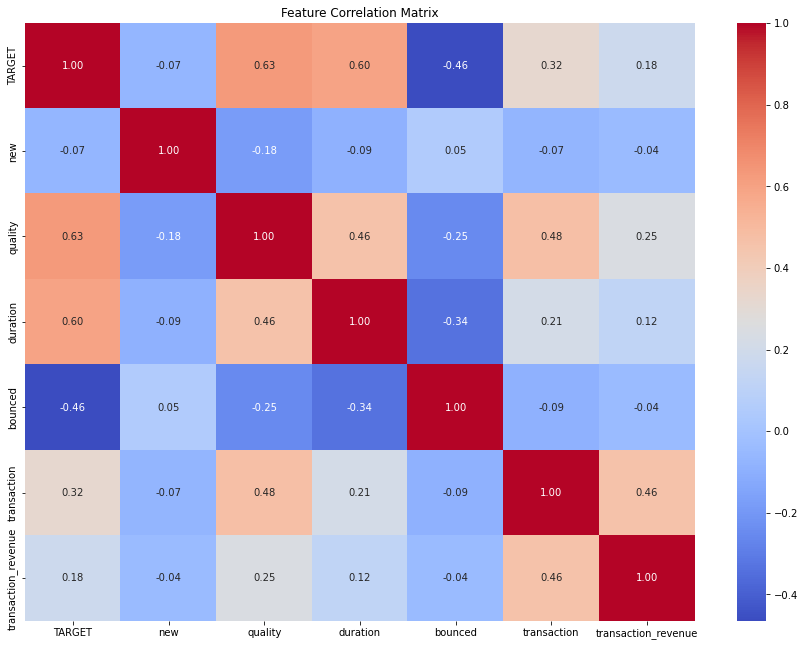

In [109]:
corr = dataset.corr()

plt.figure(figsize=(15, 11))

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')#



plt.title('Feature Correlation Matrix')

plt.show()

In [3]:
def feature_engineering(dataset):
    # browser
    dataset['browser'] = dataset['browser'].replace('Safari (in-app)', 'Safari')
    
    browser_percentage = dataset['browser'].value_counts(normalize=True)
    threshold = 0.01
    to_replace = browser_percentage[browser_percentage < threshold].index
    dataset.loc[dataset['browser'].isin(to_replace), 'browser'] = 'else'
    
    # OS
    OS_percentages = dataset['OS'].value_counts(normalize=True)
    threshold = 0.01
    to_replace = OS_percentages[OS_percentages < threshold].index
    dataset.loc[dataset['OS'].isin(to_replace), 'OS'] = 'else'
    
    # traffic_source
    split_columns = dataset['traffic_source'].str.split('.', expand=True)
    column_names = ['first word', 'second word', 'third word', 'fourth word', 'fifth word'][:split_columns.shape[1]]
    split_columns.columns = column_names
    
    change_traffic_source = ['google', 'facebook', 'yahoo', 'youtube', 'pinterest']
    
    for i in change_traffic_source:
        dataset.loc[dataset['traffic_source'].str.contains(i, case=False, na=False), 'traffic_source'] = i

    Ts_percentages = dataset['traffic_source'].value_counts(normalize=True)
    threshold = 0.01
    to_replace = Ts_percentages[Ts_percentages < threshold].index
    dataset.loc[dataset['traffic_source'].isin(to_replace), 'traffic_source'] = 'else'
    
    # traffic_medium $ referral_path
    dataset.loc[(dataset['traffic_medium'] == '(none)') & (dataset['referral_path'].notnull()), 'traffic_medium'] = 'referral'
    
    # keyword
    dataset['category'] = dataset['keyword'].str.split('_').str[0]
    for i in range(1, 101):  
        category_name = f'Category{i}' 
        dataset.loc[dataset['category'] == category_name, 'keyword'] = category_name
    dataset.drop(['category'],axis=1, inplace=True)
    
    # referral_path
    dataset['category'] = dataset['referral_path'].str.split('_').str[0]
    for i in range(1, 101):  # 1부터 100까지 반복
        category_name = f'Category{i}'  # 현재 카테고리 이름 생성
        dataset.loc[dataset['category'] == category_name, 'referral_path'] = category_name
    dataset.drop(['category'],axis=1, inplace=True)
    
    # 결측치 처리
    dataset['keyword'] = dataset['keyword'].fillna('not_applicable')
    dataset['referral_path'] = dataset['referral_path'].fillna('not_applicable')

In [4]:
feature_engineering(test_data)

NameError: name 'test_data' is not defined

In [313]:
test_data.loc[(test_data['traffic_medium'] == '(none)') & (test_data['referral_path'].notnull()), 'traffic_medium'] = 'referral'

In [296]:
# continent, subcontinent, country 칼럼을 '_'로 묶어서 하나의 칼럼으로 만듭니다.
test_data['location'] = test_data['continent'] + '_' + test_data['subcontinent'] + '_' + test_data['country']

# 기존의 continent, subcontinent, country 칼럼을 제거합니다.
test_data.drop(['continent', 'subcontinent', 'country'], axis=1, inplace=True)
threshold = 0.01
location_percentages = test_data['location'].value_counts(normalize=True) 
to_replace = location_percentages[location_percentages < threshold].index
test_data.loc[test_data['location'].isin(to_replace), 'location'] = 'else'

In [260]:
import pandas as pd

# 데이터셋의 모든 칼럼들 간의 상관관계를 계산합니다.
correlation_matrix = dataset.corr()

# 대각선 기준으로 상관관계 행렬의 삼각형 부분을 제외하고, 윗 삼각형만 남깁니다.
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))

# 상관관계가 높은 순서대로 상위 10개의 관계를 추출합니다.
top_correlations = abs(upper_triangle.unstack()).sort_values(ascending=False).drop_duplicates()

# 상위 10개의 상관관계를 출력합니다.
print(top_correlations.head(10))


quality              TARGET         0.632697
duration             TARGET         0.595276
transaction          quality        0.475440
bounced              TARGET         0.465516
transaction_revenue  transaction    0.462037
duration             quality        0.459324
bounced              duration       0.338276
transaction          TARGET         0.322085
bounced              quality        0.249945
transaction_revenue  quality        0.246401
dtype: float64


# 데이터 정제

In [200]:
df = dataset.copy()

In [315]:
df_test = test_data.copy()

In [201]:
df.drop(['sessionID'], axis=1, inplace=True)
df.drop(['userID'], axis=1, inplace=True)
# df = df.drop(['subcontinent', 'country', 'bounced'], axis=1)

In [316]:
df_test.drop(['sessionID'], axis=1, inplace=True)
df_test.drop(['userID'], axis=1, inplace=True)

In [7]:
# mode_value = df['continent'].mode()[0]
# mode_value = df['traffic_medium'].mode()[0]

# df['continent'] = df['continent'].replace('(not set)', mode_value)
# df['traffic_medium'] = df['traffic_medium'].replace('(not set)', mode_value)

In [203]:
df = pd.get_dummies(df, columns=['device', 'traffic_medium', 'OS', 'traffic_source', 'keyword'])
df = pd.get_dummies(df, columns=['browser', 'referral_path', 'location'])

In [317]:
df_test = pd.get_dummies(df_test, columns=['device', 'traffic_medium', 'OS', 'traffic_source', 'keyword'])
df_test = pd.get_dummies(df_test, columns=['browser', 'referral_path', 'location'])

In [14]:
# mean_encoded_traffic_source = df.groupby('traffic_source')['TARGET'].mean()
# df['traffic_source_mean_encoded'] = df['traffic_source'].map(mean_encoded_traffic_source)

# mean_encoded_keyword = df.groupby('keyword')['TARGET'].mean()
# df['keyword_mean_encoded'] = df['keyword'].map(mean_encoded_keyword)

# mean_encoded = df.groupby(['browser'])['TARGET'].mean()
# df['browser_mean_encoded'] = df['browser'].map(mean_encoded)

# mean_encoded_referral_path = df.groupby('referral_path')['TARGET'].mean()
# df['referral_path_mean_encoded'] = df['referral_path'].map(mean_encoded_referral_path)

# mean_encoded_OS = df.groupby('OS')['TARGET'].mean()
# df['OS_mean_encoded'] = df['OS'].map(mean_encoded_OS)

In [152]:
# df = df.drop(['referral_path'], axis=1)
# df = df.drop(['browser'], axis=1)

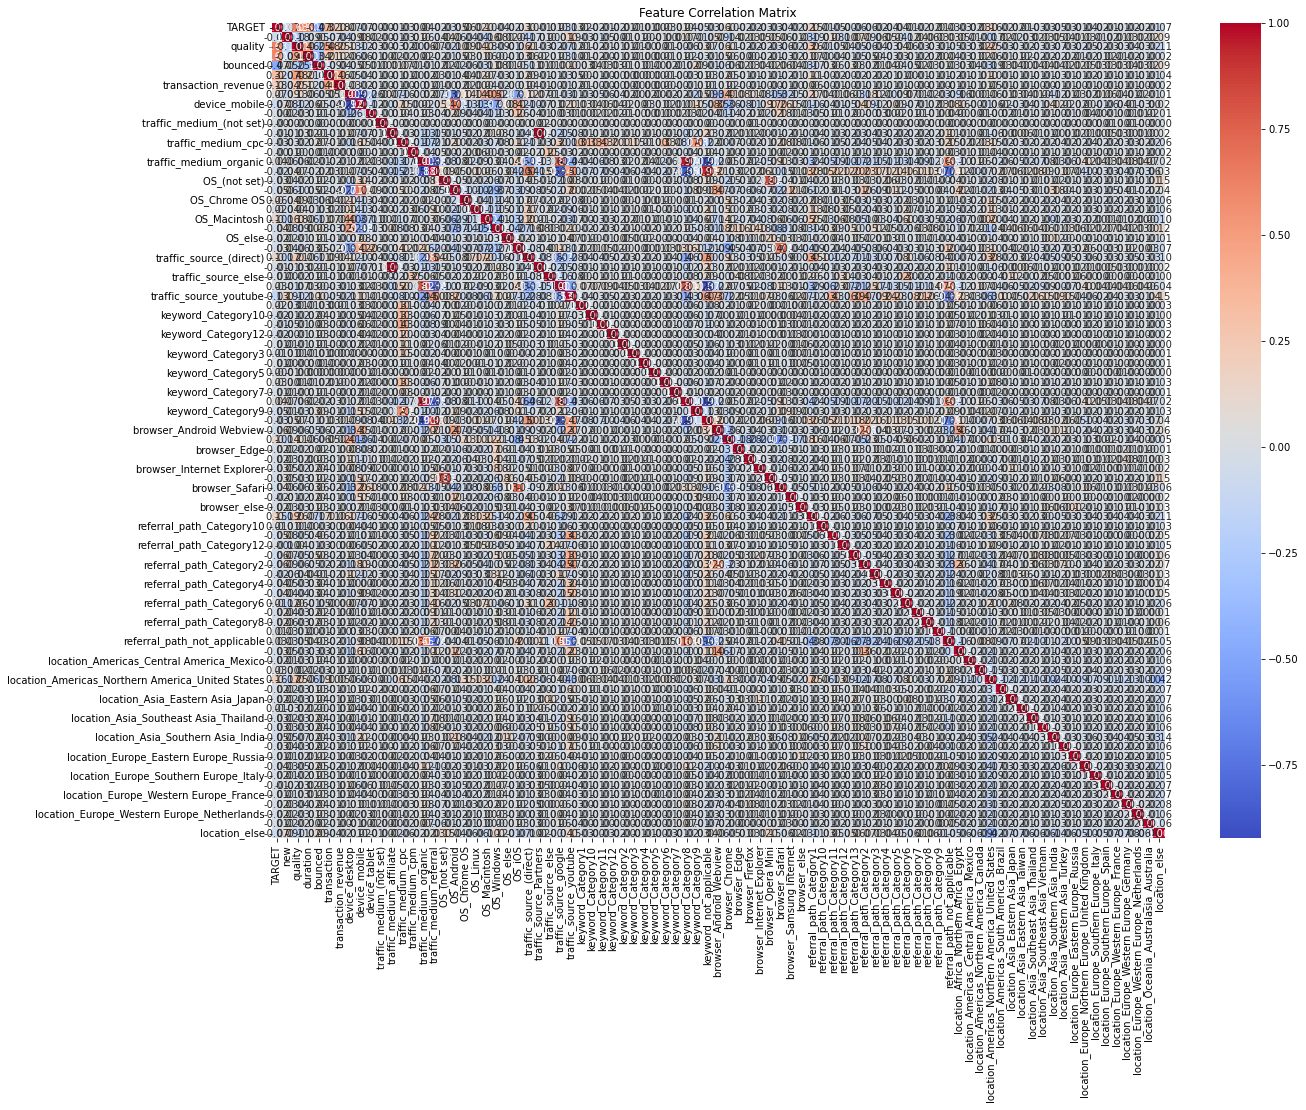

In [205]:
corr = df.corr()

plt.figure(figsize=(20, 15))

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Feature Correlation Matrix')

plt.show()

In [206]:
corr_matrix = df.corr()

target_corr_abs = corr_matrix['TARGET'].abs().sort_values(ascending=False)

top_10_corr_to_target_abs = target_corr_abs[1:11]

print(top_10_corr_to_target_abs)

quality                                             0.632697
duration                                            0.595276
bounced                                             0.465516
transaction                                         0.322085
transaction_revenue                                 0.180683
location_Americas_Northern America_United States    0.159475
referral_path_Category1                             0.149505
traffic_source_youtube                              0.126649
traffic_source_(direct)                             0.099299
OS_Macintosh                                        0.097459
Name: TARGET, dtype: float64


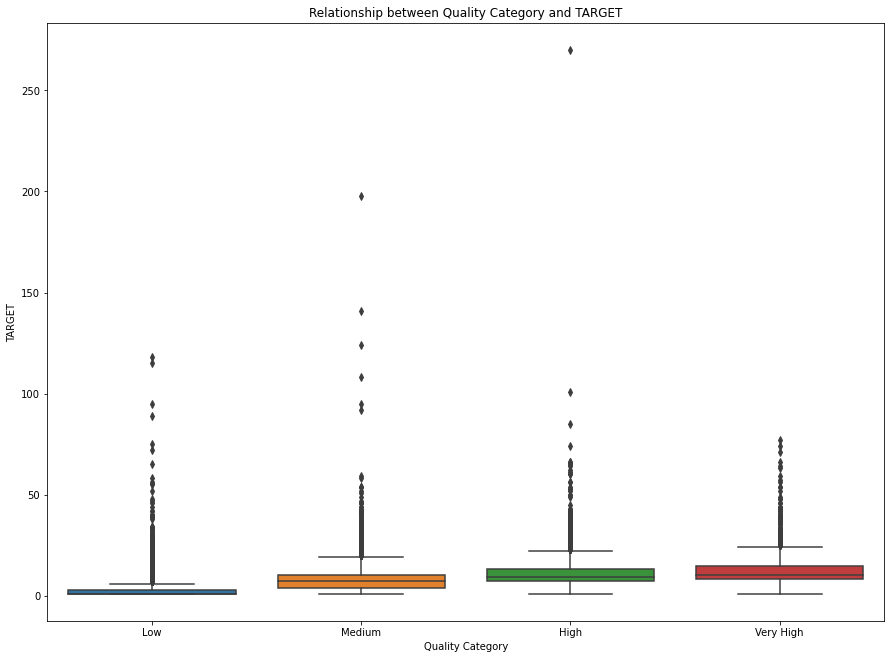

In [131]:
df['quality_category'] = pd.cut(df['quality'], bins=[0, 2, 5, 8, 10], labels=['Low', 'Medium', 'High', 'Very High'])

# 새로운 범주형 변수를 사용하여 boxplot 그리기
plt.figure(figsize=(15, 11))
sns.boxplot(x='quality_category', y='TARGET', data=df)

plt.title('Relationship between Quality Category and TARGET')
plt.xlabel('Quality Category')
plt.ylabel('TARGET')
plt.show()

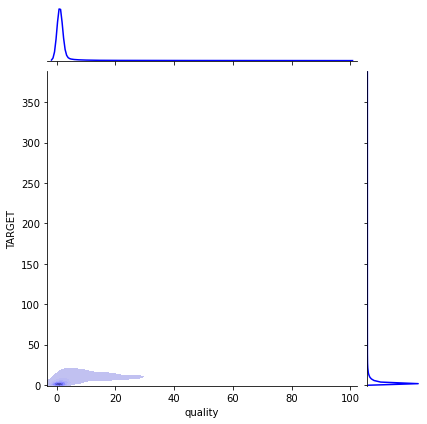

In [14]:
sns.jointplot(x='quality',y='TARGET',data=df,color='b',kind='kde', shade=True)

In [133]:
df = df.drop(['quality_category'], axis=1)

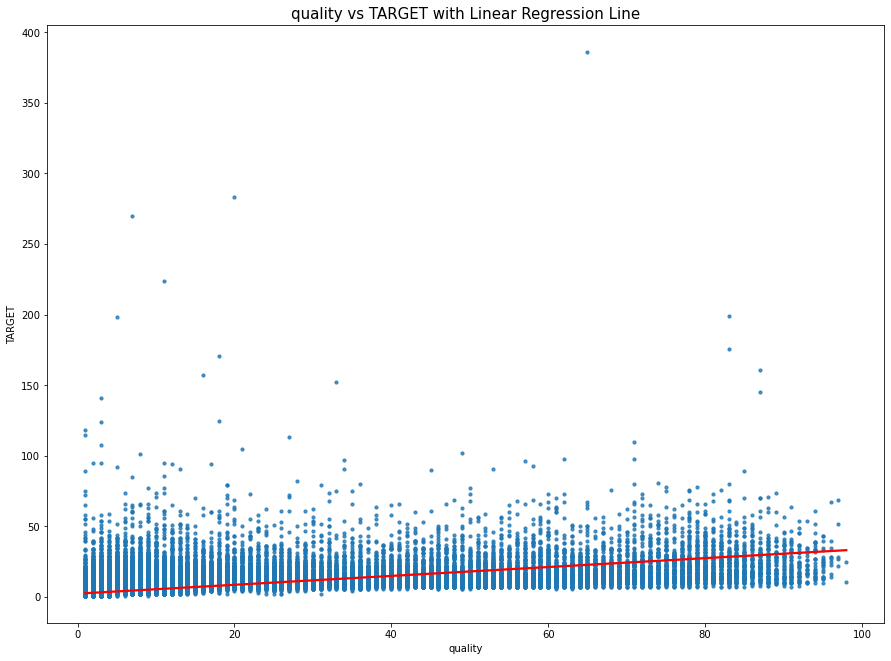

In [21]:
plt.figure(figsize=(15, 11))
sns.regplot(x='quality', y='TARGET', data=df, scatter_kws={'s': 10}, line_kws={"color": "red"})
plt.title('quality vs TARGET with Linear Regression Line', fontsize=15)
plt.xlabel('quality')
plt.ylabel('TARGET')
plt.show()

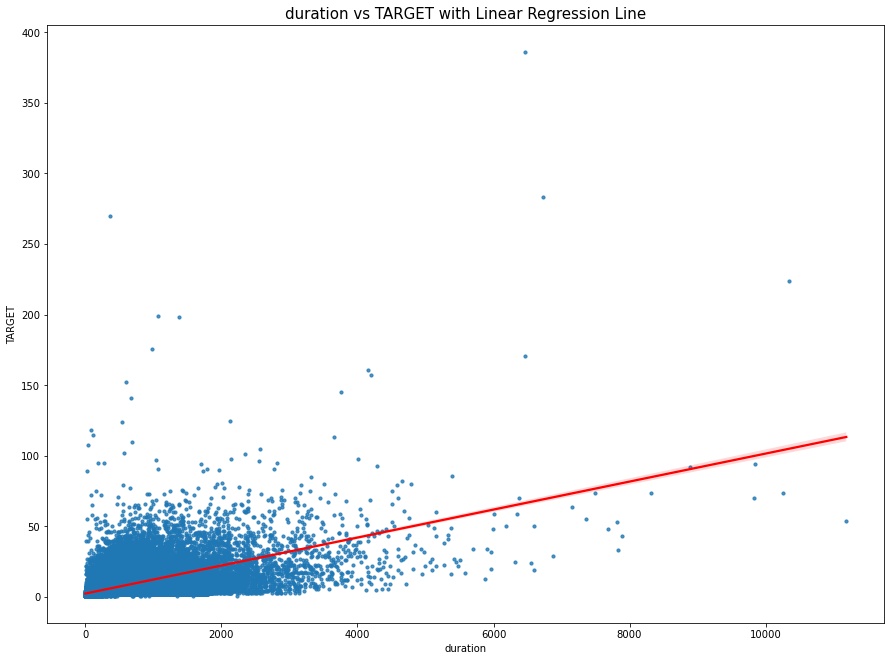

In [160]:
plt.figure(figsize=(15, 11))
sns.regplot(x='duration', y='TARGET', data=df, scatter_kws={'s': 10}, line_kws={"color": "red"})
plt.title('duration vs TARGET with Linear Regression Line', fontsize=15)
plt.xlabel('duration')
plt.ylabel('TARGET')
plt.show()

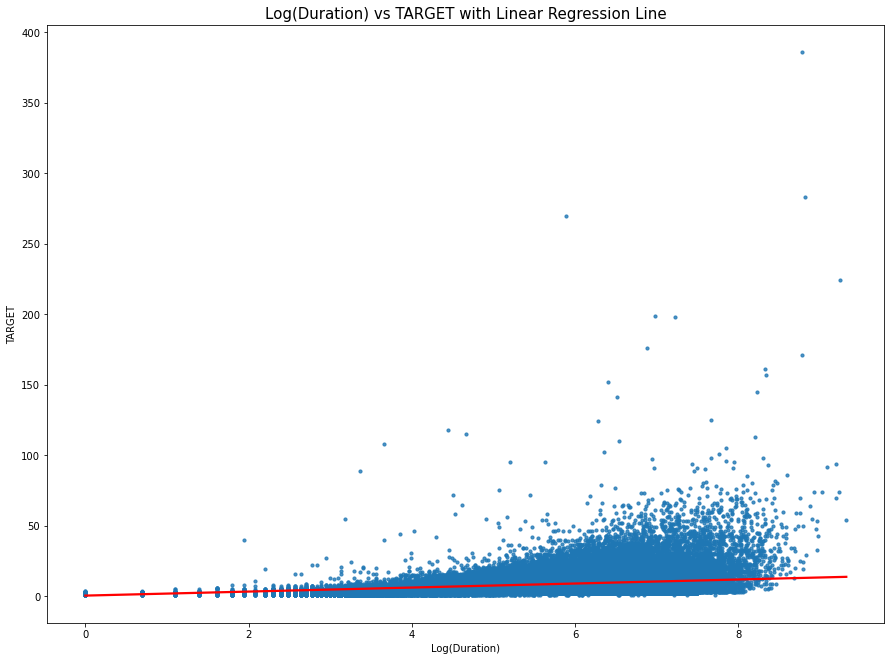

In [12]:
df['log_duration'] = np.log1p(df['duration'])

# 로그 변환된 'duration'과 'TARGET'의 관계를 시각화
plt.figure(figsize=(15, 11))
sns.regplot(x='log_duration', y='TARGET', data=df, scatter_kws={'s': 10}, line_kws={"color": "red"})
plt.title('Log(Duration) vs TARGET with Linear Regression Line', fontsize=15)
plt.xlabel('Log(Duration)')
plt.ylabel('TARGET')
plt.show()

In [13]:
df.drop(['log_duration'], axis=1, inplace=True)

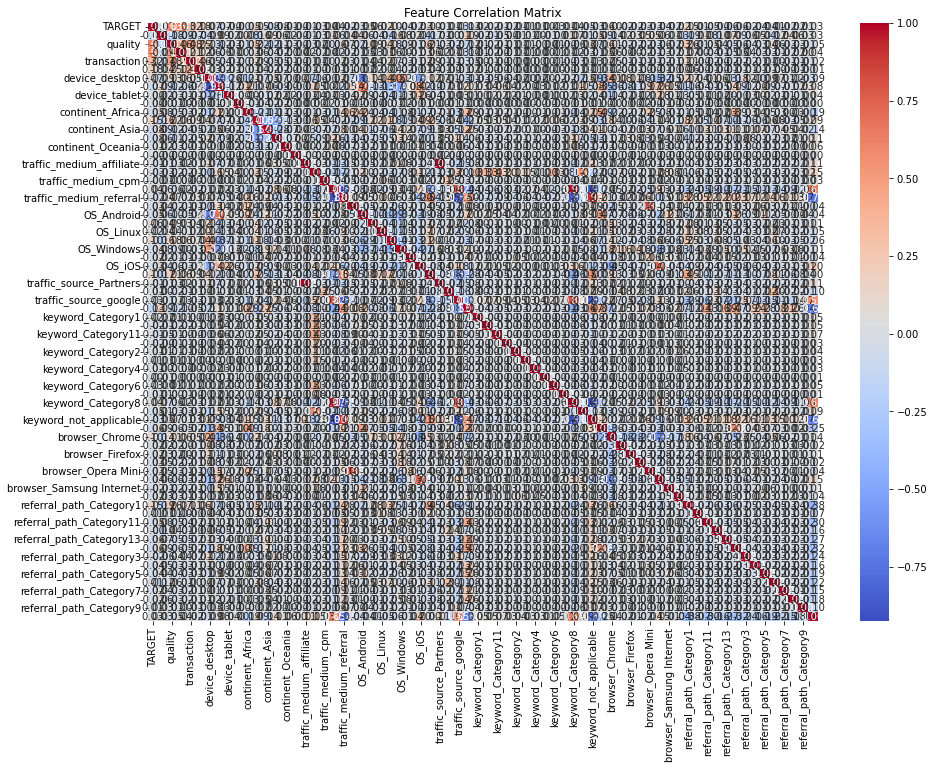

In [60]:
corr = df.corr()

plt.figure(figsize=(15, 11))

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Feature Correlation Matrix')

plt.show()

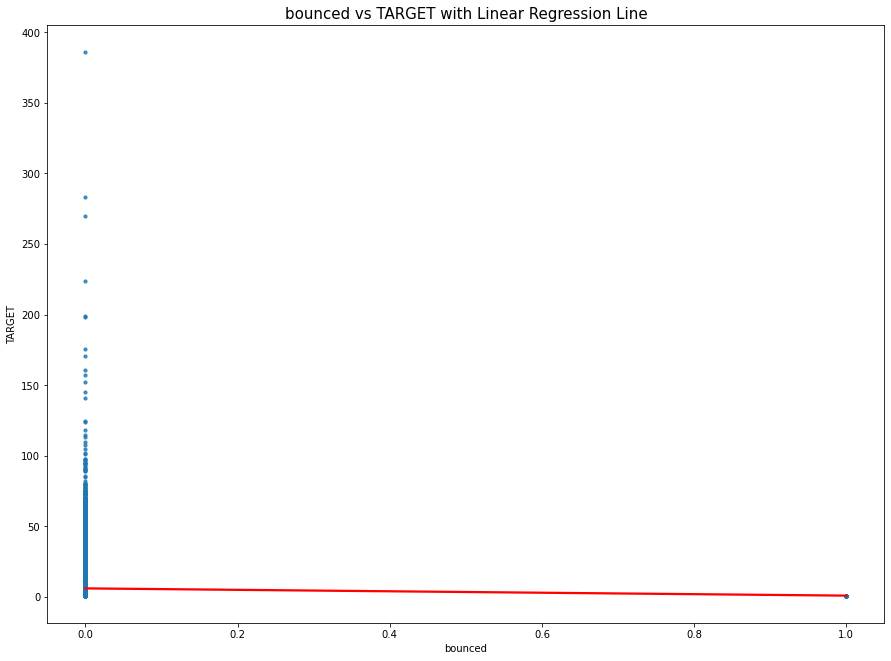

In [163]:
plt.figure(figsize=(15, 11))
sns.regplot(x='bounced', y='TARGET', data=df, scatter_kws={'s': 10}, line_kws={"color": "red"})
plt.title('bounced vs TARGET with Linear Regression Line', fontsize=15)
plt.xlabel('bounced')
plt.ylabel('TARGET')
plt.show()

# Model


In [215]:
y_train = pd.DataFrame(df['TARGET'])
x_train = df.iloc[:, 1:]

x_train.to_parquet("x_train.parquet")
y_train.to_parquet("y_train.parquet")

In [54]:
#df.drop(['quality_category'], axis=1, inplace=True)

In [266]:
# import plotly.express as px

# # `y_train`의 분포를 히스토그램으로 시각화
# fig = px.histogram(y_train, nbins=50, title='Distribution of y_train')
# fig.update_layout(xaxis_title='y_train', yaxis_title='Count')
# fig.show()


# Linear Regression with NE

In [216]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()
x_train_scaled = standard_scaler.fit_transform(x_train)

In [318]:
standard_scaler = preprocessing.StandardScaler()
x_test_scaled = standard_scaler.fit_transform(df_test)

In [217]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_train_scaled, y_train, test_size=0.33)

In [218]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((168793, 84), (83138, 84), (168793, 1), (83138, 1))

In [219]:
from sklearn.linear_model import LinearRegression
lr_ne = LinearRegression(fit_intercept=True)

In [220]:
lr_ne.fit(X_train, y_train)

LinearRegression()

In [221]:
y_hat = lr_ne.predict(X_val)
y_true = y_val

In [222]:
y_hat

array([[1.14161613],
       [1.60816887],
       [8.69581535],
       ...,
       [4.37623527],
       [0.4406884 ],
       [0.89454582]])

In [223]:
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse

TARGET    3.571116
dtype: float64

In [224]:
import sklearn
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
mse

12.752868308113474

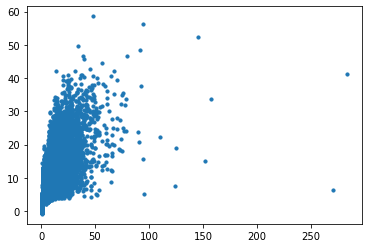

In [225]:
plt.scatter(y_true, y_hat, s=10)

# Linear Regression with SGD

In [226]:
from sklearn.linear_model import SGDRegressor
lr_SGD = SGDRegressor()

In [227]:
lr_SGD.fit(X_train, y_train)

/Users/jinwon/miniconda3/envs/ml_scratch/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SGDRegressor()

In [228]:
y_hat = lr_SGD.predict(X_val)
y_true = y_val

In [229]:
y_true = y_true.iloc[:, 0].values

In [230]:
y_hat

array([-1.16631767e+08, -4.71641022e+07, -2.09477354e+09, ...,
        2.14480463e+08,  4.73652049e+08, -2.10360283e+07])

In [231]:
# 길이 및 형태 확인
print(len(y_hat), y_hat.shape)
print(len(y_true), y_true.shape)


83138 (83138,)
83138 (83138,)


In [232]:
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse

482368142.2077447

In [233]:
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse, mse

(482368142.2077447, 2.32679024616951e+17)

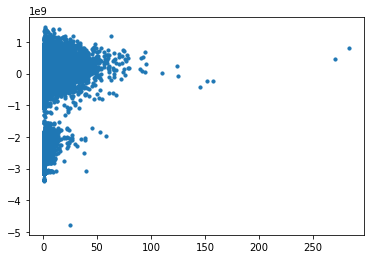

In [234]:
plt.scatter(y_true, y_hat, s=10)

## Linear Regression with Ridge & Lasso regression

In [235]:
from sklearn.linear_model import Lasso, Ridge

In [236]:
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,y_train)
#lasso = Lasso(fit_intercept=True, alpha=0.5)

Ridge(alpha=0.5)

In [237]:
y_hat = ridge.predict(X_val)
y_true = y_val
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse, mse

(TARGET    3.570559
 dtype: float64,
 12.748889839342409)

# XGBoost

In [97]:
!pip install xgboost

     |████████████████████████████████| 1.3 MB 6.7 MB/s eta 0:00:01


In [248]:
from xgboost import XGBRegressor

# XGBRegressor 모델 초기화
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=3, random_state=32, n_jobs=1)

In [321]:
eval_set = [(X_train, y_train), (X_val, y_val)]  # 여기에 학습 데이터와 검증 데이터 세트 모두 추가
model.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=10, verbose=True)
results = model.evals_result()

[0]	validation_0-rmse:6.09917	validation_1-rmse:6.10645
[1]	validation_0-rmse:5.89334	validation_1-rmse:5.90212
[2]	validation_0-rmse:5.69718	validation_1-rmse:5.70675
[3]	validation_0-rmse:5.51617	validation_1-rmse:5.52648
[4]	validation_0-rmse:5.34758	validation_1-rmse:5.35925
[5]	validation_0-rmse:5.18868	validation_1-rmse:5.19960
[6]	validation_0-rmse:5.03520	validation_1-rmse:5.05326
[7]	validation_0-rmse:4.89554	validation_1-rmse:4.91456
[8]	validation_0-rmse:4.76885	validation_1-rmse:4.78889
[9]	validation_0-rmse:4.64618	validation_1-rmse:4.66766
[10]	validation_0-rmse:4.53273	validation_1-rmse:4.55654
[11]	validation_0-rmse:4.42605	validation_1-rmse:4.45172
[12]	validation_0-rmse:4.32480	validation_1-rmse:4.35070
[13]	validation_0-rmse:4.23169	validation_1-rmse:4.25826
[14]	validation_0-rmse:4.14719	validation_1-rmse:4.17541
[15]	validation_0-rmse:4.06542	validation_1-rmse:4.09402
[16]	validation_0-rmse:3.99195	validation_1-rmse:4.02201
[17]	validation_0-rmse:3.92447	validation

[144]	validation_0-rmse:2.76870	validation_1-rmse:2.95240
[145]	validation_0-rmse:2.76837	validation_1-rmse:2.95239
[146]	validation_0-rmse:2.76546	validation_1-rmse:2.94977
[147]	validation_0-rmse:2.76418	validation_1-rmse:2.94901
[148]	validation_0-rmse:2.76214	validation_1-rmse:2.94652
[149]	validation_0-rmse:2.75747	validation_1-rmse:2.94218
[150]	validation_0-rmse:2.75540	validation_1-rmse:2.94020
[151]	validation_0-rmse:2.75293	validation_1-rmse:2.93750
[152]	validation_0-rmse:2.75047	validation_1-rmse:2.93575
[153]	validation_0-rmse:2.74710	validation_1-rmse:2.93157
[154]	validation_0-rmse:2.74590	validation_1-rmse:2.93103
[155]	validation_0-rmse:2.74217	validation_1-rmse:2.92743
[156]	validation_0-rmse:2.74037	validation_1-rmse:2.92580
[157]	validation_0-rmse:2.73881	validation_1-rmse:2.92479
[158]	validation_0-rmse:2.73851	validation_1-rmse:2.92482
[159]	validation_0-rmse:2.73678	validation_1-rmse:2.92473
[160]	validation_0-rmse:2.73577	validation_1-rmse:2.92373
[161]	validati

[286]	validation_0-rmse:2.58692	validation_1-rmse:2.83329
[287]	validation_0-rmse:2.58646	validation_1-rmse:2.83310
[288]	validation_0-rmse:2.58579	validation_1-rmse:2.83235
[289]	validation_0-rmse:2.58512	validation_1-rmse:2.83244
[290]	validation_0-rmse:2.58488	validation_1-rmse:2.83243
[291]	validation_0-rmse:2.58417	validation_1-rmse:2.83158
[292]	validation_0-rmse:2.58287	validation_1-rmse:2.83054
[293]	validation_0-rmse:2.58223	validation_1-rmse:2.83070
[294]	validation_0-rmse:2.58169	validation_1-rmse:2.83072
[295]	validation_0-rmse:2.58088	validation_1-rmse:2.82976
[296]	validation_0-rmse:2.58028	validation_1-rmse:2.82960
[297]	validation_0-rmse:2.57982	validation_1-rmse:2.82940
[298]	validation_0-rmse:2.57924	validation_1-rmse:2.82959
[299]	validation_0-rmse:2.57871	validation_1-rmse:2.82932
[300]	validation_0-rmse:2.57816	validation_1-rmse:2.82871
[301]	validation_0-rmse:2.57749	validation_1-rmse:2.82816
[302]	validation_0-rmse:2.57660	validation_1-rmse:2.82812
[303]	validati

[428]	validation_0-rmse:2.50497	validation_1-rmse:2.80024
[429]	validation_0-rmse:2.50482	validation_1-rmse:2.80020
[430]	validation_0-rmse:2.50394	validation_1-rmse:2.79913
[431]	validation_0-rmse:2.50374	validation_1-rmse:2.79915
[432]	validation_0-rmse:2.50270	validation_1-rmse:2.79901
[433]	validation_0-rmse:2.50239	validation_1-rmse:2.79910
[434]	validation_0-rmse:2.50200	validation_1-rmse:2.79922
[435]	validation_0-rmse:2.50196	validation_1-rmse:2.79927
[436]	validation_0-rmse:2.50162	validation_1-rmse:2.79918
[437]	validation_0-rmse:2.50131	validation_1-rmse:2.79975
[438]	validation_0-rmse:2.50112	validation_1-rmse:2.79979
[439]	validation_0-rmse:2.50066	validation_1-rmse:2.79983
[440]	validation_0-rmse:2.50014	validation_1-rmse:2.79914
[441]	validation_0-rmse:2.49935	validation_1-rmse:2.79861
[442]	validation_0-rmse:2.49838	validation_1-rmse:2.79853
[443]	validation_0-rmse:2.49793	validation_1-rmse:2.79840
[444]	validation_0-rmse:2.49782	validation_1-rmse:2.79857
[445]	validati

[570]	validation_0-rmse:2.44801	validation_1-rmse:2.77440
[571]	validation_0-rmse:2.44781	validation_1-rmse:2.77438
[572]	validation_0-rmse:2.44764	validation_1-rmse:2.77427
[573]	validation_0-rmse:2.44710	validation_1-rmse:2.77383
[574]	validation_0-rmse:2.44689	validation_1-rmse:2.77388
[575]	validation_0-rmse:2.44631	validation_1-rmse:2.77369
[576]	validation_0-rmse:2.44585	validation_1-rmse:2.77346
[577]	validation_0-rmse:2.44571	validation_1-rmse:2.77361
[578]	validation_0-rmse:2.44554	validation_1-rmse:2.77350
[579]	validation_0-rmse:2.44520	validation_1-rmse:2.77351
[580]	validation_0-rmse:2.44507	validation_1-rmse:2.77350
[581]	validation_0-rmse:2.44426	validation_1-rmse:2.77259
[582]	validation_0-rmse:2.44374	validation_1-rmse:2.77236
[583]	validation_0-rmse:2.44361	validation_1-rmse:2.77227
[584]	validation_0-rmse:2.44339	validation_1-rmse:2.77242
[585]	validation_0-rmse:2.44135	validation_1-rmse:2.77208
[586]	validation_0-rmse:2.44088	validation_1-rmse:2.77220
[587]	validati

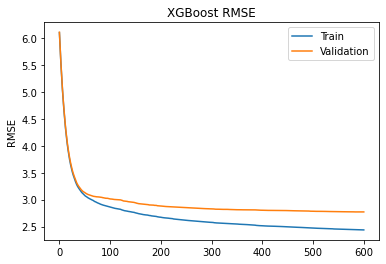

In [322]:
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Validation')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()

In [262]:
eval_set = [(X_train, y_train)]

model.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=10, verbose=True)
results = model.evals_result()

[0]	validation_0-rmse:6.09917
[1]	validation_0-rmse:5.89334
[2]	validation_0-rmse:5.69718
[3]	validation_0-rmse:5.51617
[4]	validation_0-rmse:5.34758
[5]	validation_0-rmse:5.18868
[6]	validation_0-rmse:5.03520
[7]	validation_0-rmse:4.89554
[8]	validation_0-rmse:4.76885
[9]	validation_0-rmse:4.64618
[10]	validation_0-rmse:4.53273
[11]	validation_0-rmse:4.42605
[12]	validation_0-rmse:4.32480
[13]	validation_0-rmse:4.23169
[14]	validation_0-rmse:4.14719
[15]	validation_0-rmse:4.06542
[16]	validation_0-rmse:3.99195
[17]	validation_0-rmse:3.92447
[18]	validation_0-rmse:3.86216
[19]	validation_0-rmse:3.80145
[20]	validation_0-rmse:3.74770
[21]	validation_0-rmse:3.69533
[22]	validation_0-rmse:3.65025
[23]	validation_0-rmse:3.60756
[24]	validation_0-rmse:3.56634
[25]	validation_0-rmse:3.52910
[26]	validation_0-rmse:3.49365
[27]	validation_0-rmse:3.46156
[28]	validation_0-rmse:3.43334
[29]	validation_0-rmse:3.40570
[30]	validation_0-rmse:3.37978
[31]	validation_0-rmse:3.35149
[32]	validation_0-

[260]	validation_0-rmse:2.60763
[261]	validation_0-rmse:2.60690
[262]	validation_0-rmse:2.60612
[263]	validation_0-rmse:2.60550
[264]	validation_0-rmse:2.60440
[265]	validation_0-rmse:2.60355
[266]	validation_0-rmse:2.60329
[267]	validation_0-rmse:2.60244
[268]	validation_0-rmse:2.60077
[269]	validation_0-rmse:2.59966
[270]	validation_0-rmse:2.59903
[271]	validation_0-rmse:2.59827
[272]	validation_0-rmse:2.59677
[273]	validation_0-rmse:2.59619
[274]	validation_0-rmse:2.59519
[275]	validation_0-rmse:2.59463
[276]	validation_0-rmse:2.59393
[277]	validation_0-rmse:2.59305
[278]	validation_0-rmse:2.59256
[279]	validation_0-rmse:2.59182
[280]	validation_0-rmse:2.59143
[281]	validation_0-rmse:2.59064
[282]	validation_0-rmse:2.59022
[283]	validation_0-rmse:2.59011
[284]	validation_0-rmse:2.58909
[285]	validation_0-rmse:2.58760
[286]	validation_0-rmse:2.58692
[287]	validation_0-rmse:2.58646
[288]	validation_0-rmse:2.58579
[289]	validation_0-rmse:2.58512
[290]	validation_0-rmse:2.58488
[291]	va

[517]	validation_0-rmse:2.46617
[518]	validation_0-rmse:2.46598
[519]	validation_0-rmse:2.46540
[520]	validation_0-rmse:2.46495
[521]	validation_0-rmse:2.46470
[522]	validation_0-rmse:2.46410
[523]	validation_0-rmse:2.46389
[524]	validation_0-rmse:2.46371
[525]	validation_0-rmse:2.46354
[526]	validation_0-rmse:2.46339
[527]	validation_0-rmse:2.46237
[528]	validation_0-rmse:2.46192
[529]	validation_0-rmse:2.46135
[530]	validation_0-rmse:2.46102
[531]	validation_0-rmse:2.46070
[532]	validation_0-rmse:2.46051
[533]	validation_0-rmse:2.46005
[534]	validation_0-rmse:2.45978
[535]	validation_0-rmse:2.45932
[536]	validation_0-rmse:2.45915
[537]	validation_0-rmse:2.45869
[538]	validation_0-rmse:2.45851
[539]	validation_0-rmse:2.45834
[540]	validation_0-rmse:2.45622
[541]	validation_0-rmse:2.45592
[542]	validation_0-rmse:2.45561
[543]	validation_0-rmse:2.45497
[544]	validation_0-rmse:2.45453
[545]	validation_0-rmse:2.45424
[546]	validation_0-rmse:2.45390
[547]	validation_0-rmse:2.45373
[548]	va

[774]	validation_0-rmse:2.38720
[775]	validation_0-rmse:2.38705
[776]	validation_0-rmse:2.38684
[777]	validation_0-rmse:2.38669
[778]	validation_0-rmse:2.38655
[779]	validation_0-rmse:2.38636
[780]	validation_0-rmse:2.38611
[781]	validation_0-rmse:2.38587
[782]	validation_0-rmse:2.38561
[783]	validation_0-rmse:2.38551
[784]	validation_0-rmse:2.38519
[785]	validation_0-rmse:2.38496
[786]	validation_0-rmse:2.38473
[787]	validation_0-rmse:2.38443
[788]	validation_0-rmse:2.38400
[789]	validation_0-rmse:2.38387
[790]	validation_0-rmse:2.38370
[791]	validation_0-rmse:2.38307
[792]	validation_0-rmse:2.38295
[793]	validation_0-rmse:2.38253
[794]	validation_0-rmse:2.38232
[795]	validation_0-rmse:2.38205
[796]	validation_0-rmse:2.38189
[797]	validation_0-rmse:2.38152
[798]	validation_0-rmse:2.38140
[799]	validation_0-rmse:2.38116
[800]	validation_0-rmse:2.38088
[801]	validation_0-rmse:2.38065
[802]	validation_0-rmse:2.38037
[803]	validation_0-rmse:2.38028
[804]	validation_0-rmse:2.38008
[805]	va

In [323]:
y_pred_test = model.predict(x_test_scaled)

In [324]:
def submission():
    submission = pd.read_csv('./sample_submission.csv')
    submission['TARGET'] = y_pred_test
    submission.to_csv('./baseline_submission.csv', index=False)

submission()

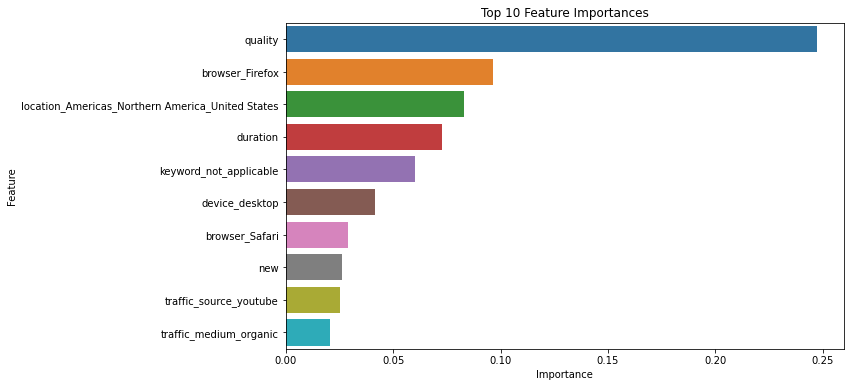

In [251]:
# import matplotlib.pyplot as plt

# feature_names = x_train.columns
# importances = model.feature_importances_
# sns.barplot(y=feature_names, x=importances, estimator=np.mean)
# plt.title("Feature importances")
# plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# 피처 중요도와 이름을 쌍으로 구성
feature_importances = list(zip(x_train.columns, model.feature_importances_))
# 중요도를 기준으로 내림차순 정렬
feature_importances.sort(key=lambda x: x[1], reverse=True)

# 상위 10개의 피처와 중요도를 추출
top_features = feature_importances[:10]
top_feature_names = [x[0] for x in top_features]
top_importances = [x[1] for x in top_features]

# 상위 10개의 피처만 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=top_importances, y=top_feature_names)
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [244]:
# # feature_importances가 0인 피처들의 인덱스를 가져옵니다.
# zero_importance_indices = np.where(feature_importances == 0)[0]

# # 0이 아닌 피처들의 인덱스를 가져옵니다.
# non_zero_importance_indices = np.where(feature_importances != 0)[0]

# # 0이 아닌 피처들의 중요도와 함께 출력합니다.
# for i in non_zero_importance_indices:
#     print(f"Feature {i+1}: {feature_importances[i]}")

# # 0이 아닌 피처들을 추출합니다.
# X_train_non_zero_importance = X_train[:, non_zero_importance_indices]

In [245]:
# # feature_importances가 0이 아닌 피처들의 인덱스를 가져옵니다.
# non_zero_importance_indices = np.where(model.feature_importances_ != 0)[0]

# # 0이 아닌 피처들만 추출합니다.
# X_train_non_zero_importance = X_train[:, non_zero_importance_indices]
# X_val_non_zero_importance = X_val[:, non_zero_importance_indices]

# # 새로운 모델을 초기화하고 0이 아닌 피처들을 사용하여 학습합니다.
# new_model = XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=32, n_jobs=1)
# eval_set = [(X_train_non_zero_importance, y_train), (X_val_non_zero_importance, y_val)]
# new_model.fit(X_train_non_zero_importance, y_train, eval_set=eval_set, early_stopping_rounds=10, verbose=True)
# new_results = new_model.evals_result()


# LightGBM

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# 기본 모델 훈련
model_lgbm = LGBMRegressor()
model_rf = RandomForestRegressor()

model_lgbm.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

# 기본 모델 예측
preds_lgbm = model_lgbm.predict(X_val)
preds_rf = model_rf.predict(X_val)

# 메타 모델을 위한 새로운 특성 생성
X_meta = np.column_stack((preds_lgbm, preds_rf))

# 메타 모델 훈련
model_meta = LinearRegression()
model_meta.fit(X_meta, y_val)

# 메타 모델 예측
final_preds = model_meta.predict(X_meta)

# 성능 평가
mse = mean_squared_error(y_val, final_preds)
rmse = np.sqrt(mse)  
print(f"Root Mean Squared Error: {rmse}")